<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time

#Viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Modélisation 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV, train_test_split
from sklearn_evaluation import plot
from sklearn.preprocessing import StandardScaler

## Function

In [2]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [3]:
#Load dataset breast cancer
data = load_breast_cancer()

In [4]:
#On convetit en df
df = pd.DataFrame(data.data, columns=data.feature_names)

# Ajout de la cible au DataFrame
df['target'] = data['target']

# Optionnel : Ajouter des noms de cibles descriptifs
df['target_name'] = df['target'].map({i: name for i, name in enumerate(data['target_names'])})

df.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  target_name  
0                  0.11890       0    malignant  
1                  0.08902       0    malignant  
2                  0.08758       0    malignant  
3                  0.17300       0    malignant  
4                  0.07678       0    malignant  

[5 rows x 32 columns]

In [5]:
# Tirage aléatoire de 5 lignes
df.sample(5, random_state=42) 

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
204            0.1058         0.08005              0.03821         0.1925   
70             0.1029         0.10800              0.07951         0.1582   
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   
540            0.1120         0.06737              0.02594         0.1818   

     mean fractal dimension  ...  worst perimeter  worst area  \
204                 0.06373  ...            96.05       677.9   
70                  0.05461  ...           165.90      1866.0   
131                 0.05796  ...           124.90      1156.0   
431                 0.07102  ...            89.61       515.8   
540                 0.06782  ...            78.78       457.8   

     worst smoothness  worst compactness  worst concavity  \
204            0.1426             0.2378           0.2671   
70             0.1193             0.2336           0.2687   
131            0.1546             0.2394           0.3791   
431            0.1450             0.2629           0.2403   
540            0.1345             0.2118           0.1797   

     worst concave points  worst symmetry  worst fractal dimension  target  \
204               0.10150          0.3014                  0.08750       1   
70                0.17890          0.2551                  0.06589       0   
131               0.15140          0.2837                  0.08019       0   
431               0.07370          0.2556                  0.09359       1   
540               0.06918          0.2329                  0.08134       1   

     target_name  
204       benign  
70     malignant  
131    malignant  
431       benign  
540       benign  

[5 rows x 32 columns]

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Vérifier s'il y a des valeurs manquantes
if df.isnull().values.any():
    print("Des valeurs manquantes sont présentes.")
else:
    print("Aucune valeur manquante.")

Aucune valeur manquante.


In [8]:
# Statistiques descriptives pour chaque variable 
df.describe()
# On remarque que chaque information a 3 métriques (mean / error (écart type)/ worst). Donc on a 10 informations différentes, donc 30 variables.  

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

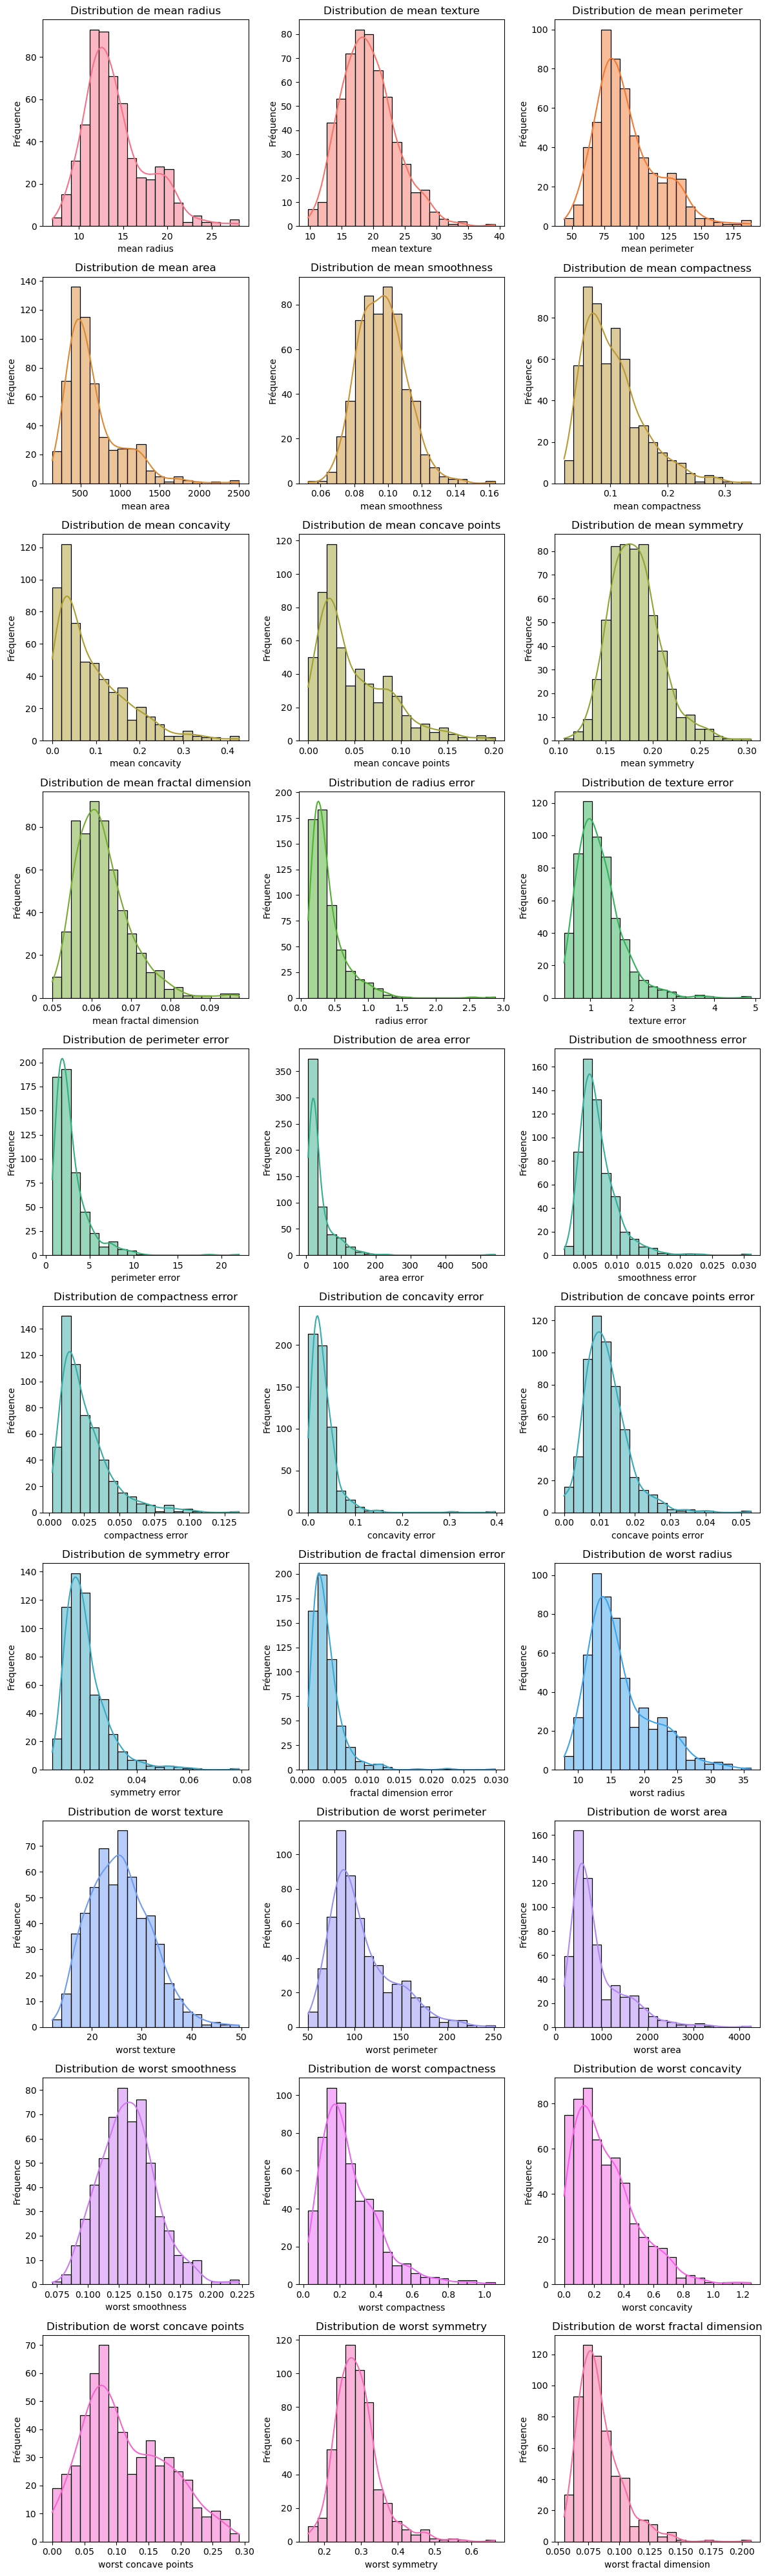

In [9]:
# Distribution des variables quantitatives

# Sélection des colonnes numériques
quantitative_columns = df.select_dtypes(include=['float64']).columns

# Paramètres pour les sous-graphiques
num_vars = len(quantitative_columns)
cols = 3  # Nombre de colonnes de sous-graphiques
rows = (num_vars + cols - 1) // cols  # Calcul du nombre de lignes
colors = sns.color_palette("husl", num_vars)  # Palette de couleurs

# Création des sous-graphiques
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()  # Aplatir les axes pour les itérer facilement

for i, column in enumerate(quantitative_columns):
    sns.histplot(df[column], kde=True, bins=20, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes inutilisés si le nombre de variables est impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster les espaces entre les graphiques
plt.tight_layout()
plt.show()

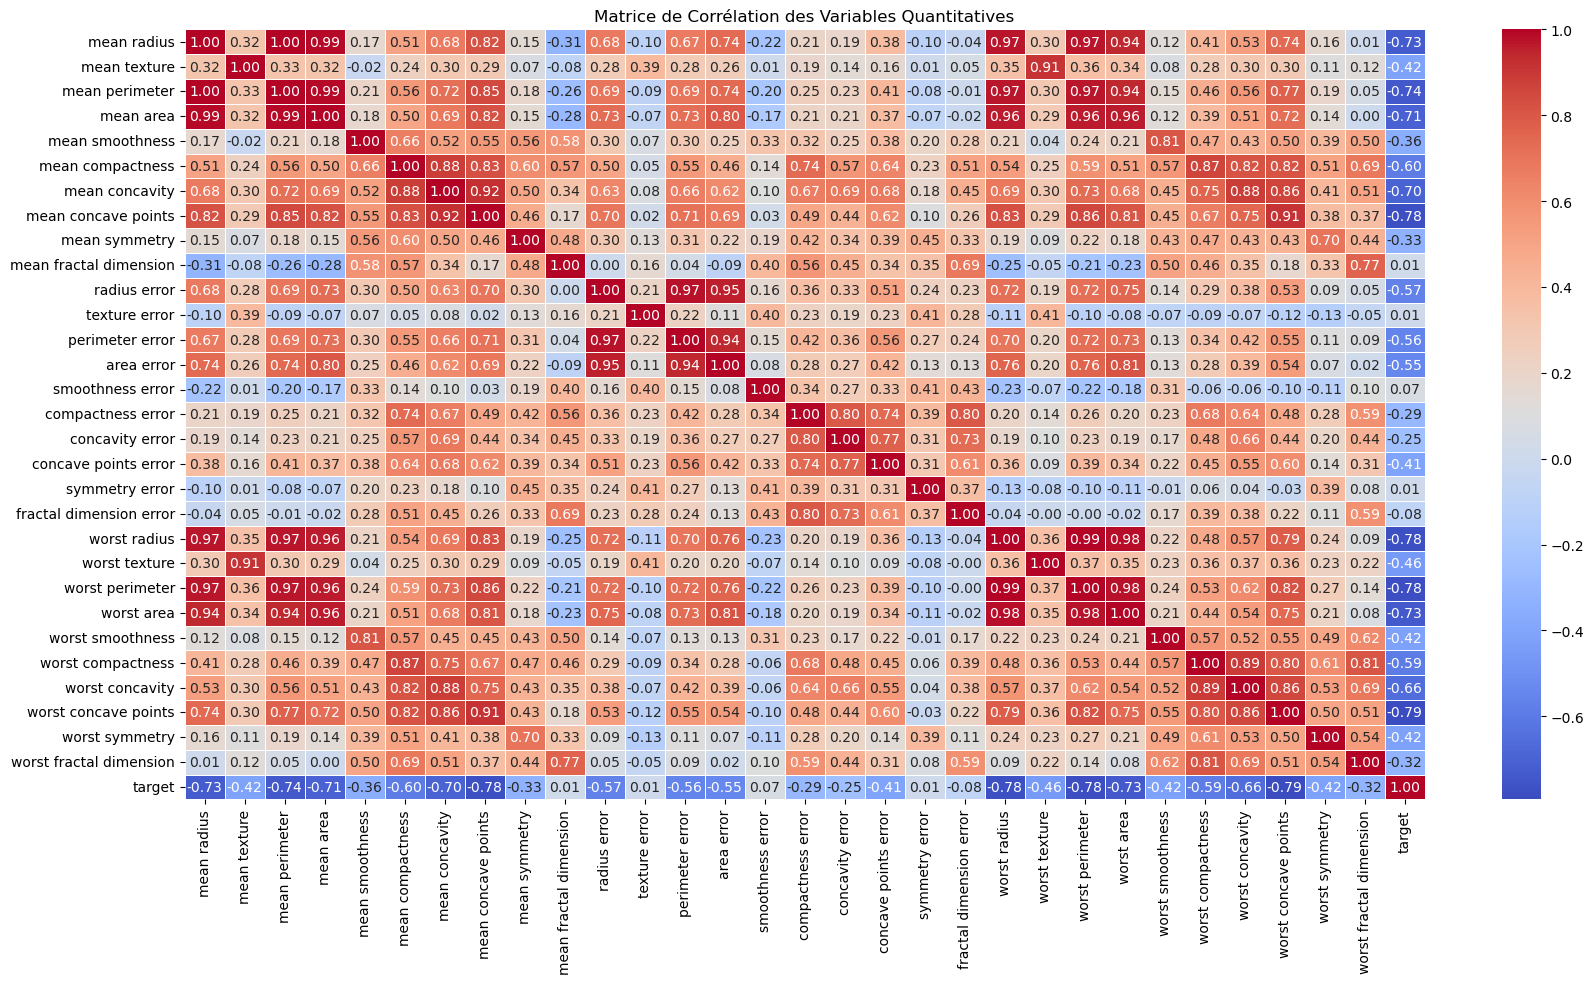

In [10]:
#Matrice de corrélations - lien linéaire entre 2 variables

# Sélectionner uniquement les variables quantitatives
quantitative_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation uniquement sur les variables quantitatives
correlation_matrix = quantitative_columns.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Quantitatives')
plt.show()

#Dans ce TD, on utilie des noyaux pour faire des liens non linéaires.
#Beaucoup de corrélations car plusieurs attribut pour la même variable. 
#Pour un modèle SVM, ce n'ai pas grave d'avoir des variables corrélé mais cela peut compliquer les interprétations. 

In [11]:
# Sélectionner les variables numériques pour la standardisation
numerical_features = df.select_dtypes(include=[np.number]).columns

# Standardisation des variables
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [12]:
# Analyse des outliers

# Créer un DataFrame pour Plotly (ajouter une colonne pour les noms des variables)
df_standardized_melted = df_standardized.melt(var_name='Variables', value_name='Standardized Values')

# Créer un boxplot interactif avec Plotly sans légende
fig = px.box(df_standardized_melted, x='Variables', y='Standardized Values', color='Variables', 
             title='Boxplots des Variables Standardisées', 
             labels={'Standardized Values': 'Valeurs Standardisées'}, 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Supprimer la légende
fig.update_layout(showlegend=False)

# Afficher le graphique
fig.show()

Variables de type 'object' : Index(['target_name'], dtype='object')


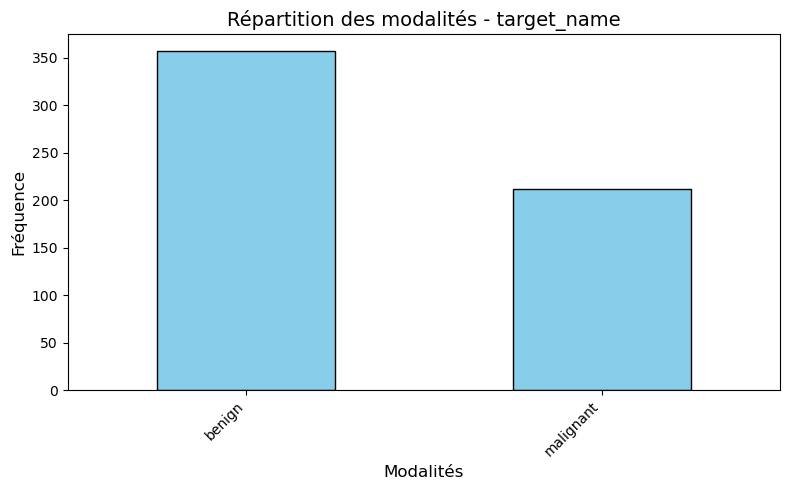

In [13]:
# Sélectionner automatiquement les variables de type 'object' (qualitatives)
object_columns = df.select_dtypes(include=['object']).columns

# Afficher les variables sélectionnées
print("Variables de type 'object' :", object_columns)

#Répartition des modalités de la variable Target name
plt.figure(figsize=(8, 5))
df['target_name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Répartition des modalités - target_name", fontsize=14)
plt.xlabel("Modalités", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajuster l'affichage pour éviter le chevauchement
plt.show()

#### 3) Recoder les variables si nécessaire


In [14]:
#Afficher le type des variables
print(df.dtypes)
#Toutes les variables sont déjà bien codé

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [15]:
# Sélectionner uniquement les variables quantitatives
quantitative_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation uniquement sur les variables quantitatives
correlation_matrix = quantitative_columns.corr()

# Définir un seuil pour la corrélation
correlation_threshold = 0.85

# Identifier les paires de variables très corrélées
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Supprimer les variables très corrélées dans le DataFrame d'origine
df = df.drop(columns=high_correlation)

# Résultats
print("\nVariables supprimées en raison d'une corrélation élevée :")
print(high_correlation)

#On fait l'hypothèse de supprimer par rapport aux corrélations. Mais cela prends en compte un lien linéaire et ici on étudie aussi les liens non linéaire. 



Variables supprimées en raison d'une corrélation élevée :
['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [16]:
# Sélectionner les colonnes des variables explicatives (toutes sauf 'target' et 'target_name')
X = df.drop(columns=['target', 'target_name'])

# Sélectionner la colonne de la variable cible
y = df['target']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

# Affichage des tailles des ensembles
print(f"Ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Ensemble de test : {X_test.shape[0]} exemples")

Ensemble d'entraînement : 455 exemples
Ensemble de test : 114 exemples


In [17]:
# Normalisation des données
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [18]:
#Regression logistique
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train) 

SGDClassifier(random_state=42)

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [19]:
# Sélectionner uniquement 2 features (par exemple 'mean radius' et 'mean texture')
X = df[['mean radius', 'mean texture']]
y = df['target']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [20]:
# Fonction pour afficher la frontière de décision
def plot_predictions(clf, axes, ax=None):
    '''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    '''
    if ax is None:
        ax = plt.gca()
        
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

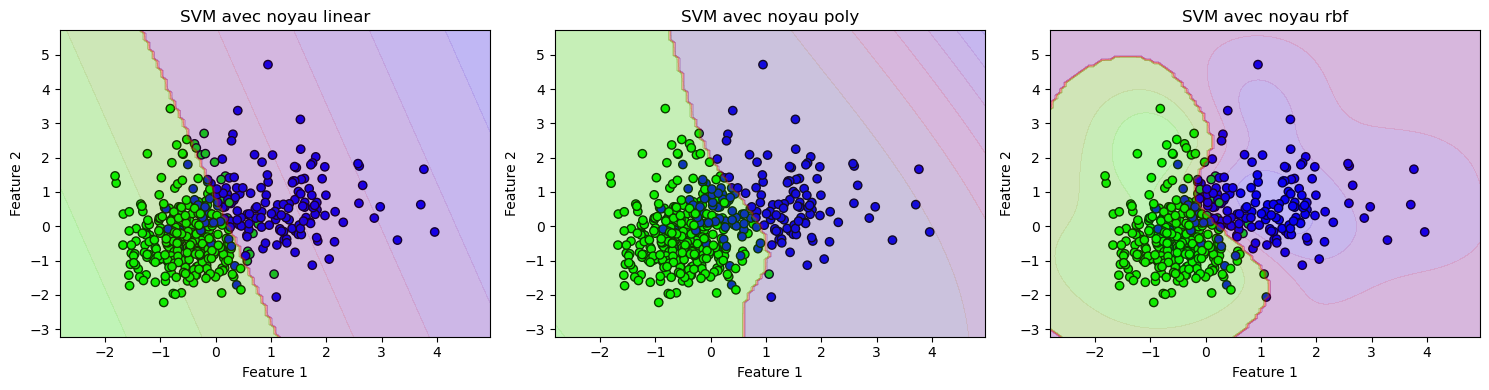

In [21]:
# Définir les axes pour la visualisation
axes = [X_train_sc[:, 0].min() - 1, X_train_sc[:, 0].max() + 1, 
        X_train_sc[:, 1].min() - 1, X_train_sc[:, 1].max() + 1]

# Créer une figure avec 3 sous-graphiques côte à côte
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Tester différents noyaux
kernels = ['linear', 'poly', 'rbf']

for idx, kernel in enumerate(kernels):
    # SVC avec différents noyaux
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train_sc, y_train)
    
    # Tracer les points d'entraînement sur le sous-graphique correspondant
    axs[idx].scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, 
                     edgecolors='k', cmap=plt.cm.brg)
    
    # Appeler la fonction pour afficher la frontière de décision
    plot_predictions(clf, axes, ax=axs[idx])
    
    # Personnaliser l'affichage du graphique
    axs[idx].set_xlim(axes[0], axes[1])
    axs[idx].set_ylim(axes[2], axes[3])
    axs[idx].set_xlabel('Feature 1')
    axs[idx].set_ylabel('Feature 2')
    axs[idx].set_title(f'SVM avec noyau {kernel}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [22]:
#plt.scatter('mean radius', 'mean texture', c='target')
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

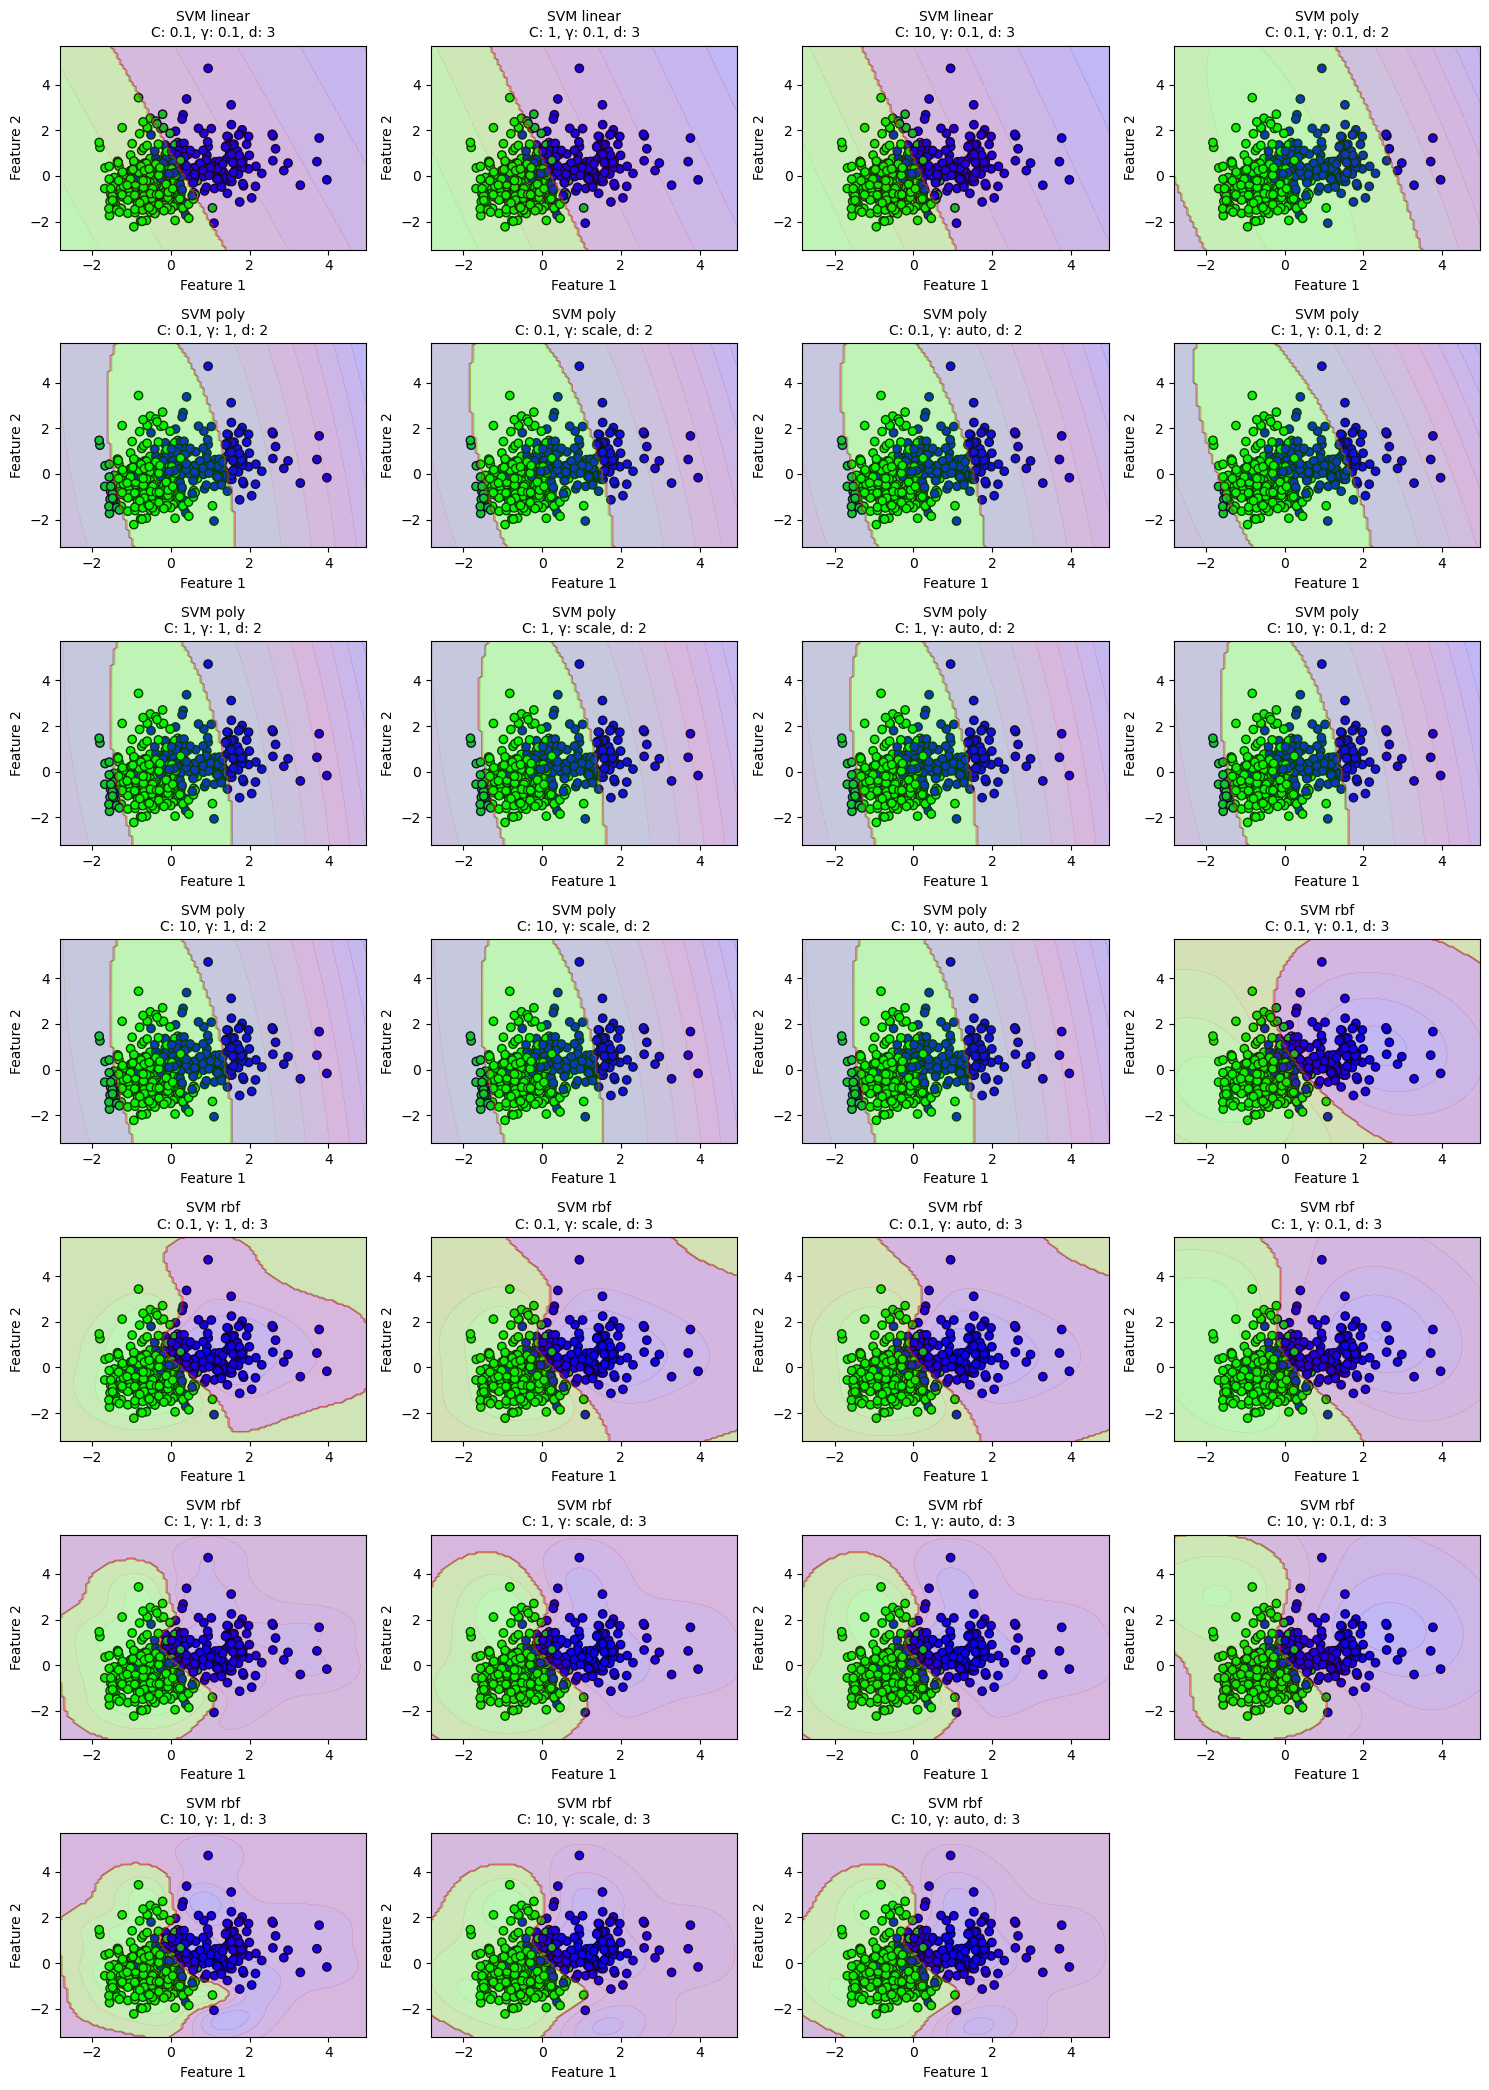

In [23]:
#6.2 - 

C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 'scale', 'auto'] # Tester différentes valeurs pour gamma (kernel 'rbf' et 'poly')
degree_values = [2, 3, 4] # Tester différentes valeurs pour degree (seulement pour 'poly')

# Calculer le nombre total de graphiques et le nombre de lignes nécessaires
total_plots = 0
for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            if kernel != 'linear' or (kernel == 'linear' and gamma == gamma_values[0]):
                total_plots += 1

n_cols = 4
n_rows = (total_plots + n_cols - 1) // n_cols  # Arrondi supérieur

# Créer la figure avec les sous-graphiques
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
axs = axs.ravel()  # Convertir en tableau 1D pour un accès plus facile

# Compteur pour suivre l'index du sous-graphique actuel
plot_idx = 0

for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            # Pour le noyau 'linear', gamma n'a pas d'effet, donc on ne fait qu'une itération
            if kernel == 'linear' and gamma != gamma_values[0]:
                continue
                
            # Ne définir degree que pour le noyau 'poly'
            degree = degree_values[0] if kernel == 'poly' else 3
            
            # SVC avec différents noyaux et hyperparamètres
            clf = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, random_state=42)
            clf.fit(X_train_sc, y_train)
            
            # Tracer les points d'entraînement
            axs[plot_idx].scatter(X_train_sc[:, 0], X_train_sc[:, 1], 
                                c=y_train, edgecolors='k', cmap=plt.cm.brg)
            
            # Appeler la fonction pour afficher la frontière de décision
            plot_predictions(clf, axes, ax=axs[plot_idx])
            
            # Personnaliser l'affichage du graphique
            axs[plot_idx].set_xlim(axes[0], axes[1])
            axs[plot_idx].set_ylim(axes[2], axes[3])
            axs[plot_idx].set_xlabel('Feature 1')
            axs[plot_idx].set_ylabel('Feature 2')
            axs[plot_idx].set_title(f'SVM {kernel}\nC: {C}, γ: {gamma}, d: {degree}', fontsize=10)
            
            plot_idx += 1

# Masquer les sous-graphiques vides restants
for idx in range(plot_idx, len(axs)):
    axs[idx].set_visible(False)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

Noyau Linéaire : 
- L'augmentation de C permet aux points d'être plus correctement classés, mais les marges seront plus étroites et la frontière sera moins lisse.

Noyau Polynomial : 
- L'augmentation de y change graphiquement la forme de la frontière de décision.  Un grand y a une frontière de décision complexe et sinueuse, risque de surajustement.
- L'augmentation de C rend la frontière de décision plus étroite et plus ajustée aux points de données
- Une augmentation du degré rend la frontière de décision plus complexe, avec des courbes plus détaillées.

Noyau RBF : 
- Une augmentation de C rend la frontière de décision plus précise, mais cela risque d'augmenter le surajustement,
- y joue un rôle clé avec le noyau RBF, affectant directement la forme de la frontière de décision. Une valeur élevée de y crée une frontière de décision plus courbée. 

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [24]:
# Entraîner les modèles
lgr.fit(X_train_sc, y_train)
svc.fit(X_train_sc, y_train)
sgdc_svm.fit(X_train_sc, y_train)

# Faire des prédictions
y_pred_lgr = lgr.predict(X_test_sc)
y_pred_svc = svc.predict(X_test_sc)
y_pred_sgdc_svm = sgdc_svm.predict(X_test_sc)

# Calculer l'accuracy et afficher un rapport de classification
print("Performance Régression Logistique:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgr):.4f}")
print(classification_report(y_test, y_pred_lgr))

print("\nPerformance SVM avec noyau linéaire:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(classification_report(y_test, y_pred_svc))

print("\nPerformance SGD Classifier (SVM hinge loss):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgdc_svm):.4f}")
print(classification_report(y_test, y_pred_sgdc_svm))


Performance Régression Logistique:
Accuracy: 0.9035
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114


Performance SVM avec noyau linéaire:
Accuracy: 0.9035
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114


Performance SGD Classifier (SVM hinge loss):
Accuracy: 0.8772
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        43
           1       0.94      0.86      0.90        71

    accuracy

In [25]:
# Tester les modèles avec différents noyaux
for i, kernel in enumerate(kernels):
    # Créer le modèle SVC pour chaque noyau
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train_sc, y_train)

    # Faire des prédictions
    y_pred = clf.predict(X_test_sc)
    
    # Calculer l'accuracy et afficher un rapport de classification
    acc = accuracy_score(y_test, y_pred)
    print(f"Performance SVM avec noyau {kernel}:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Afficher les frontières de décision si c'est possible (2D pour visualisation simple)
    if X_train_sc.shape[1] == 2:  # Si nous avons deux features pour visualisation
        ax = axs[i]
        # Tracer les points d'entraînement
        ax.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.brg)
        
        # Tracer la frontière de décision
        xx, yy = np.meshgrid(np.linspace(X_train_sc[:, 0].min(), X_train_sc[:, 0].max(), 100),
                             np.linspace(X_train_sc[:, 1].min(), X_train_sc[:, 1].max(), 100))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.brg)
        ax.set_title(f"Frontière SVM avec noyau: {kernel}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

# Ajuster l'affichage
plt.tight_layout()
plt.show()

Performance SVM avec noyau linear:
Accuracy: 0.9035
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

Performance SVM avec noyau poly:
Accuracy: 0.8246
              precision    recall  f1-score   support

           0       0.93      0.58      0.71        43
           1       0.79      0.97      0.87        71

    accuracy                           0.82       114
   macro avg       0.86      0.78      0.79       114
weighted avg       0.84      0.82      0.81       114

Performance SVM avec noyau rbf:
Accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                   

<Figure size 640x480 with 0 Axes>

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [26]:
# Liste des modèles à évaluer
models = [lgr, svc, sgdc_svm]
model_names = ['Régression Logistique', 'SVM linéaire', 'SGD Classifier']

# Effectuer la cross-validation et afficher les résultats pour chaque modèle
for model, name in zip(models, model_names):
    # Effectuer la cross-validation avec 5 folds (par défaut)
    scores = cross_val_score(model, X_train_sc, y_train, cv=5, scoring='accuracy')
    
    # Afficher les résultats
    print(f"Performance de {name}:")
    print(f"  Précision moyenne (cross-validation): {np.mean(scores):.4f}")
    print(f"  Écart-type des scores: {np.std(scores):.4f}")
    print(f"  Scores pour chaque fold: {scores}\n")

Performance de Régression Logistique:
  Précision moyenne (cross-validation): 0.8835
  Écart-type des scores: 0.0283
  Scores pour chaque fold: [0.9010989  0.89010989 0.92307692 0.85714286 0.84615385]

Performance de SVM linéaire:
  Précision moyenne (cross-validation): 0.8835
  Écart-type des scores: 0.0283
  Scores pour chaque fold: [0.89010989 0.87912088 0.93406593 0.85714286 0.85714286]

Performance de SGD Classifier:
  Précision moyenne (cross-validation): 0.8418
  Écart-type des scores: 0.0415
  Scores pour chaque fold: [0.85714286 0.79120879 0.91208791 0.83516484 0.81318681]



#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [27]:
# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Instancier le modèle SVM
svm = SVC(random_state=42)

# Configurer la recherche sur grille
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_sc, y_train)

# Résultats du meilleur modèle
best_model = grid_search.best_estimator_
print("\nMeilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test_sc)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy avec le meilleur modèle RBF : {accuracy:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Meilleurs paramètres trouvés :
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy avec le meilleur modèle RBF : 0.9123

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



<center><h4> Alors, êtes-vous devenu un bon médecin et savez vous détecter un cancer??</h4></center>